## 0. Описание задачи словами

**Постановка проблемы:**
В данном проекте решается задача автоматической категоризации видеоконтента. На основе метаданных  необходимо определить формат произведения: является ли оно полнометражным **фильмом (Movie)** или **сериалом (Series)**.

**Тип задачи машинного обучения:**
Это задача **обучения с учителем**, так как имеется размеченный датасет. Поскольку целевая переменная принимает два значения, решается задача **бинарной классификации**.

**Данные:**
* **Признаки:** Категориальные (жанры, языки, актеры) и числовые (рейтинги IMDb/Rotten Tomatoes, длительность, награды).
* **Целевая переменная:** `Series or Movie`.
    * Класс 0: Movie
    * Класс 1: Series

**Цель:**
Обучить классификатор для предсказания типа контента с высокой точностью и проанализировать влияние признаков.

## 1. Прочитать данные
Загрузка библиотек и чтение файла с данными. Первичный просмотр `head()`, `info()` и размерности данных.

In [3]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

df = pd.read_csv(r'C:\Users\titanpc\Desktop\netflix-rotten-tomatoes-metacritic-imdb.csv')

print(df.shape)
print(df.info())
df.head()

(15480, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13526 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   flo

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,NaN,01 Oct 2016,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,4.0,NaN,22 Sep 2011,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


## 2. Провести разведочный анализ данных
Визуализация целевой переменной для проверки баланса классов. Построение гистограмм для числовых признаков и матрицы корреляций для выявления зависимостей.

--- Распределение целевой переменной ---
Series or Movie
Movie     11697
Series     3783
Name: count, dtype: int64

--- Доли классов ---
Series or Movie
Movie     0.75562
Series    0.24438
Name: proportion, dtype: float64


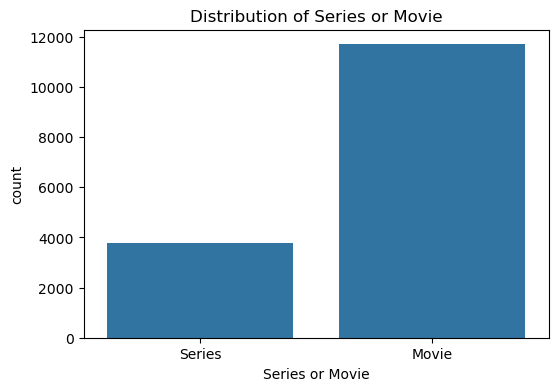


--- Основные статистики ---
       Hidden Gem Score    IMDb Score  Rotten Tomatoes Score  \
count      13379.000000  13381.000000            6382.000000   
mean           5.937551      6.496054              59.523034   
std            2.250202      1.146910              26.999173   
min            0.600000      1.000000               0.000000   
25%            3.800000      5.800000              38.000000   
50%            6.800000      6.600000              64.000000   
75%            7.900000      7.300000              83.000000   
max            9.800000      9.700000             100.000000   

       Metacritic Score  Awards Received  Awards Nominated For    IMDb Votes  
count       4336.000000      6075.000000           7661.000000  1.337900e+04  
mean          56.813653         8.764444             13.983161  4.272841e+04  
std           17.582545        18.311171             29.821052  1.257012e+05  
min            5.000000         1.000000              1.000000  5.000000e+00  

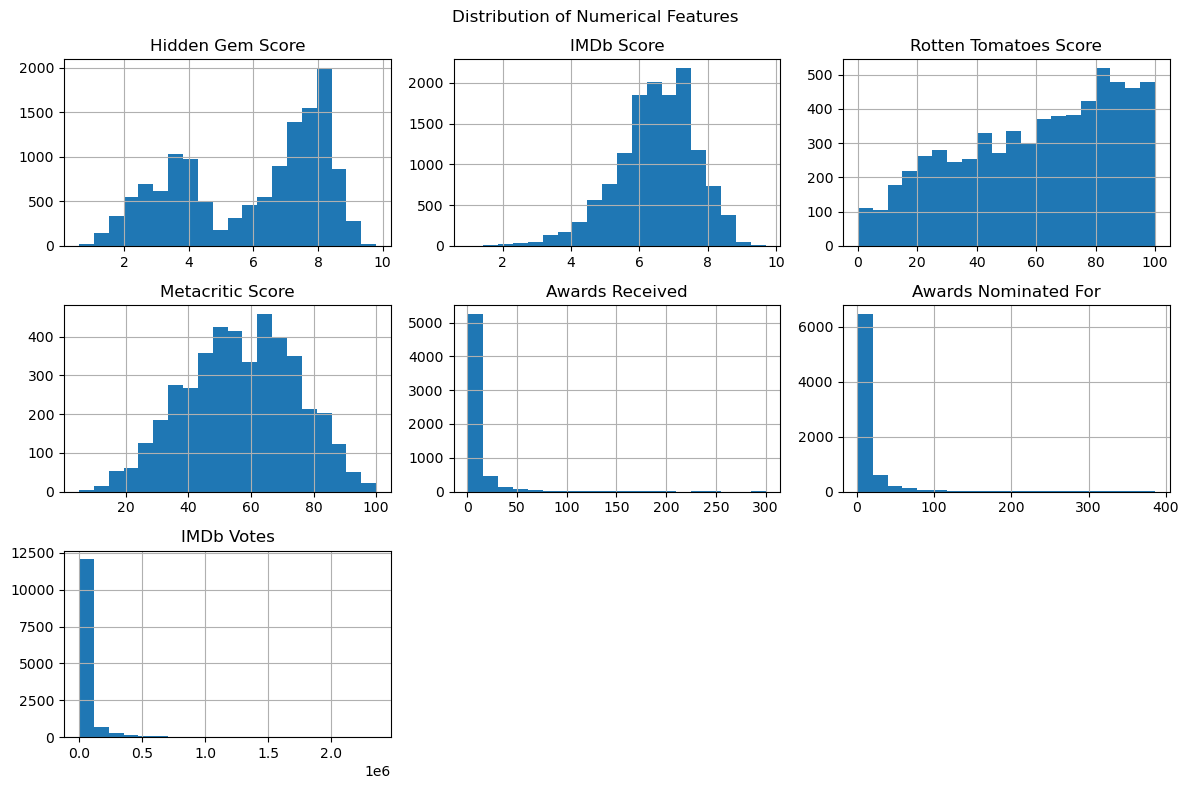

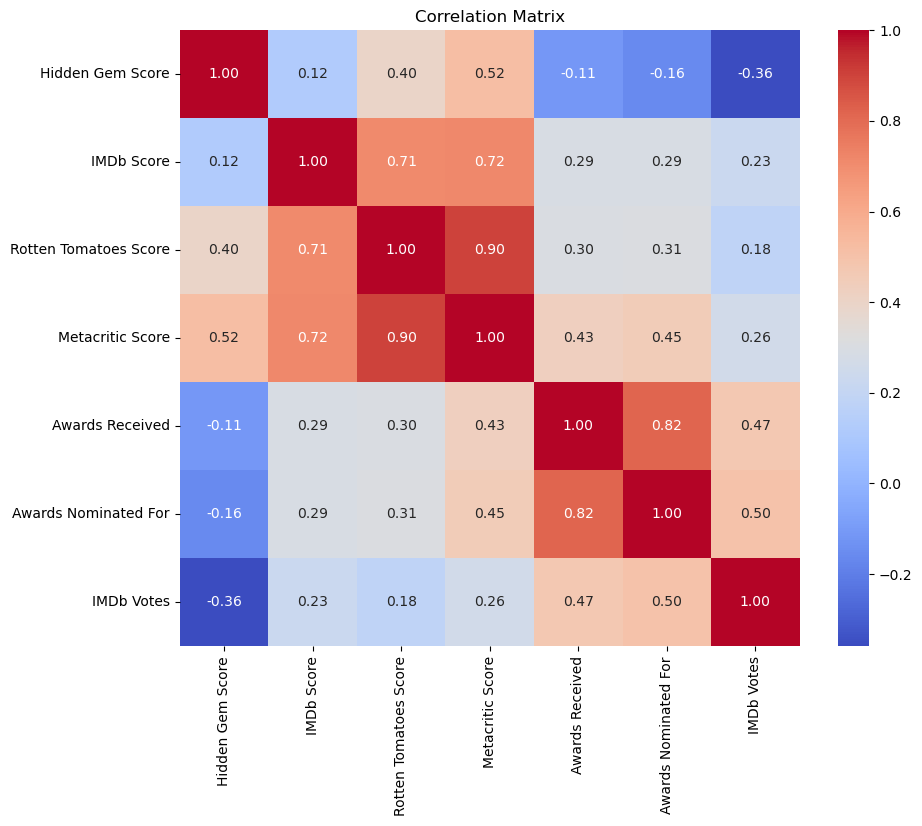

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Распределение целевой переменной ---")
print(df['Series or Movie'].value_counts())
print("\n--- Доли классов ---")
print(df['Series or Movie'].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x='Series or Movie', data=df)
plt.title('Distribution of Series or Movie')
plt.show()

print("\n--- Основные статистики ---")
print(df.describe())

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Интерпретация результатов

На этапе разведочного анализа данных были сделаны следующие ключевые выводы, которые определяют стратегию предобработки:

**1. Анализ целевой переменной (Дисбаланс классов):**
* Наблюдается явный дисбаланс классов: фильмов (**Movie**) — около **75%**, сериалов (**Series**) — около **25%**.
* **Влияние на ML:** Модель может быть склонна предсказывать мажоритарный класс (фильмы), чтобы максимизировать Accuracy.
* **Решение:**
    * При разбиении на обучающую и тестовую выборки необходимо использовать параметр `stratify`, чтобы сохранить пропорции классов.
    * Для оценки качества модели одной метрики *Accuracy* будет недостаточно, нужно смотреть на *Precision*, *Recall* и *F1-score*.

**2. Анализ числовых признаков (Гистограммы):**
* **Разный масштаб:** Признаки имеют принципиально разные диапазоны значений. Например, `IMDb Score` варьируется от 1 до 10, а `IMDb Votes` может достигать миллионов.
* **Распределение:** `IMDb Score` имеет распределение, близкое к нормальному. `Hidden Gem Score` имеет более сложное распределение.
* **Влияние на ML:** Алгоритмы, основанные на расстояниях (как **k-NN**), будут некорректно работать без нормализации, так как признак с большими значениями (`Votes`) будет полностью доминировать над рейтингами.
* **Решение:** Обязательное применение нормализации (StandardScaler или MinMax) в Пункте 5.

**3. Корреляционный анализ:**
* Выявлена сильная положительная корреляция (**0.90**) между `Rotten Tomatoes Score` и `Metacritic Score`. Это логично, так как оба признака отражают оценку критиков.
* **Влияние на ML:** Наличие сильно скоррелированных признаков (мультиколлинеарность) избыточно и может ухудшить интерпретируемость линейных моделей, хотя для k-NN это менее критично.
* **Решение:** Так как эти столбцы также содержали огромное количество пропусков (см. анализ `info` в п.1), они были удалены в процессе очистки данных, что автоматически решило проблему мультиколлинеарности.

## 3. Обработать пропущенные значения

Стратегия обработки пропусков:
1. **Удаление:** Столбцы `Rotten Tomatoes Score`, `Metacritic Score`, `Boxoffice`, `Awards Received`, `Awards Nominated For` содержат слишком много пропусков (более 50%). Восстановить их достоверно невозможно, поэтому мы их удаляем, чтобы не вносить шум. Также удаляем технические столбцы (`Netflix Link`, `Poster`, `Image`), которые не нужны для классификации.
2. **Заполнение медианой:** Пропуски в числовых рейтингах (`Hidden Gem Score`, `IMDb Score`) заполняем медианным значением. Медиана устойчива к выбросам.
3. **Заполнение константой:** Пропуски в категориальных признаках (`Director`, `Writer`, `Actors`, `View Rating`, `Genre`, `Languages`) заполняем значением "Unknown", выделяя отсутствие информации в отдельную категорию.

In [11]:
cols_to_drop = [
    'Rotten Tomatoes Score', 'Metacritic Score', 'Boxoffice', 'Production House',
    'Awards Received', 'Awards Nominated For', 'TMDb Trailer', 'Trailer Site',
    'Netflix Link', 'IMDb Link', 'Poster', 'Image', 'Summary', 'Title', 'Release Date', 'Netflix Release Date'
]
df = df.drop(columns=cols_to_drop, errors='ignore')

numeric_cols = ['Hidden Gem Score', 'IMDb Score', 'IMDb Votes']
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

categorical_cols = ['Director', 'Writer', 'Actors', 'View Rating', 'Genre', 'Tags', 'Languages', 'Country Availability', 'Runtime']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

print(df.isna().sum())
print(df.shape)

Genre                   0
Tags                    0
Languages               0
Series or Movie         0
Hidden Gem Score        0
Country Availability    0
Runtime                 0
Director                0
Writer                  0
Actors                  0
View Rating             0
IMDb Score              0
IMDb Votes              0
dtype: int64
(15480, 13)


## 4. Обработать категориальные признаки

1. **Кодирование Target:** Целевую переменную `Series or Movie` переводим в бинарный формат: `Movie` = 0, `Series` = 1.
2. **Отбор признаков:** Для построения базовой модели мы оставим числовые признаки (`Hidden Gem Score`, `IMDb Score`, `IMDb Votes`) и категориальные с небольшим числом уникальных значений (`View Rating`, `Runtime`).
3. **One-Hot Encoding:** Категориальные признаки преобразуем в числовые с помощью `pd.get_dummies`. Это создаст новые столбцы-индикаторы для каждого уникального значения (например, `View Rating_R`, `View Rating_PG-13`).

In [14]:
df['Target'] = df['Series or Movie'].map({'Movie': 0, 'Series': 1})

features_to_keep = ['Hidden Gem Score', 'IMDb Score', 'IMDb Votes', 'View Rating', 'Runtime', 'Target']
df_model = df[features_to_keep].copy()

df_model = pd.get_dummies(df_model, columns=['View Rating', 'Runtime'], drop_first=True)

print("Размер таблицы после кодирования:", df_model.shape)
print("\nПример данных:")
print(df_model.head())

Размер таблицы после кодирования: (15480, 36)

Пример данных:
   Hidden Gem Score  IMDb Score  IMDb Votes  Target  View Rating_Approved  \
0               4.3         7.9    205926.0       1                 False   
1               7.0         5.8      2838.0       0                 False   
2               6.4         4.3      1720.0       0                 False   
3               7.7         6.5      1147.0       1                 False   
4               8.1         6.3        63.0       0                 False   

   View Rating_E  View Rating_E10+  View Rating_G  View Rating_GP  \
0          False             False          False           False   
1          False             False          False           False   
2          False             False          False           False   
3          False             False          False           False   
4          False             False          False           False   

   View Rating_M  View Rating_M/PG  View Rating_MA-17  View 

## 5. Провести нормализацию (StandardScaler)
Алгоритм KNN чувствителен к масштабу данных. Мы используем `StandardScaler`, чтобы привести все признаки к среднему значению 0 и стандартному отклонению 1. Это уравняет вклад `IMDb Votes` (тысячи) и `Score` (единицы) в расчёт расстояния.

In [17]:
from sklearn.preprocessing import StandardScaler

X = df_model.drop('Target', axis=1)
y = df_model['Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Пример нормализованных данных (первая строка):")
print(X_scaled[0])

Пример нормализованных данных (первая строка):
[-0.83054054  1.30273145  1.43348797 -0.03772547 -0.00803764 -0.01136731
 -0.0905888  -0.01607684 -0.00803764 -0.00803764 -0.00803764 -0.02411915
 -0.01136731 -0.30532006 -0.21053031 -0.31197367 -0.03315718  2.52695393
 -0.00803764 -0.23313573 -0.09022567 -0.2814194  -0.14781619 -0.09757728
 -0.09202747 -0.04622053 -0.00803764 -0.00803764 -0.91140155 -0.08726798
 -0.01607684 -0.14849925  1.69525039 -0.388276   -0.00803764]


## 6. Разбить данные на обучающую и тестовую выборки
Делим данные в пропорции 80/20.
**Важно:** Используем параметр `stratify=y`. Поскольку у нас дисбаланс (фильмов 75%, сериалов 25%), этот параметр гарантирует, что в тестовой выборке сохранится та же пропорция классов, что и в исходной.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (12384, 35)
Размер тестовой выборки: (3096, 35)


## 7. Запустить классификатор (KNN)
Обучаем базовую модель K-Nearest Neighbors с параметром `n_neighbors=5`.
Мы посмотрим на метрику `Accuracy` (общая точность) и `Classification Report` (детальная точность по каждому классу).

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n--- Classification Report ---\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9867571059431525

--- Classification Report ---

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2339
           1       0.95      0.99      0.97       757

    accuracy                           0.99      3096
   macro avg       0.98      0.99      0.98      3096
weighted avg       0.99      0.99      0.99      3096



## 8-9. Подбор оптимального K и анализ ошибок
Мы обучим модель в цикле для значений `k` от 1 до 40.
На графике мы увидим, как меняется точность (Error Rate) и выберем то значение `k`, где ошибка минимальна (или точность максимальна), но модель не переобучена.

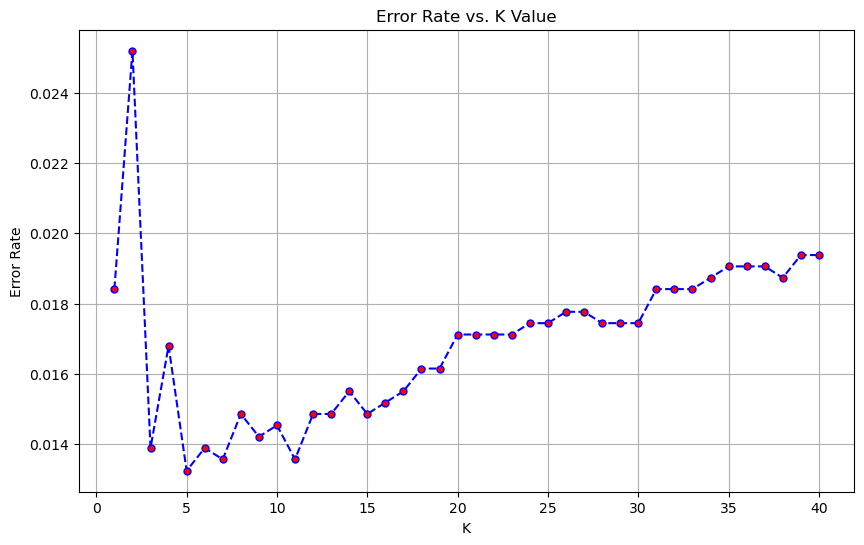

Минимальная ошибка: 0.0132
Оптимальное число соседей K: 5


In [26]:
import matplotlib.pyplot as plt
import numpy as np

error_rate = []

for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()
plt.show()

min_error = min(error_rate)
optimal_k = error_rate.index(min_error) + 1
print(f"Минимальная ошибка: {min_error:.4f}")
print(f"Оптимальное число соседей K: {optimal_k}")

## 10. Запустить другие классификаторы
Для сравнения используем **Random Forest** .

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n--- Random Forest Report ---\n")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9851421188630491

--- Random Forest Report ---

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2339
           1       0.95      0.99      0.97       757

    accuracy                           0.99      3096
   macro avg       0.97      0.99      0.98      3096
weighted avg       0.99      0.99      0.99      3096



### Дополнительные модели: Логистическая регрессия и SVM
Для полноты эксперимента проверим:
1.  **Logistic Regression:** Простой линейный классификатор.
2.  **SVC (Support Vector Classifier):** Метод опорных векторов, который строит разделяющую плоскость в многомерном пространстве.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print("--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log))

print("\n--- Support Vector Machine (SVM) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))

--- Logistic Regression ---
Accuracy: 0.9874031007751938

--- Support Vector Machine (SVM) ---
Accuracy: 0.9861111111111112


In [34]:
models_compare = pd.DataFrame({
    'Model': ['KNN', 'Random Forest', 'Logistic Regression', 'SVM'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),      
        accuracy_score(y_test, y_pred_rf),   
        accuracy_score(y_test, y_pred_log),  
        accuracy_score(y_test, y_pred_svc)  
    ]
})

print(models_compare.sort_values(by='Accuracy', ascending=False))

                 Model  Accuracy
2  Logistic Regression  0.987403
0                  KNN  0.986757
3                  SVM  0.986111
1        Random Forest  0.985142


In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

models = {
    'KNN': knn,
    'Random Forest': rf,
    'Logistic Regression': log_reg,
    'SVM': svc
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (Series)': precision_score(y_test, y_pred),
        'Recall (Series)': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    })

compare_df = pd.DataFrame(results)
print(compare_df.sort_values(by='F1-Score', ascending=False))

                 Model  Accuracy  Precision (Series)  Recall (Series)  \
2  Logistic Regression  0.987403            0.952141         0.998679   
3                  SVM  0.986111            0.950758         0.994716   
1        Random Forest  0.985142            0.954023         0.986790   
0                  KNN  0.980620            0.947368         0.974901   

   F1-Score  
2  0.974855  
3  0.972240  
1  0.970130  
0  0.960938  


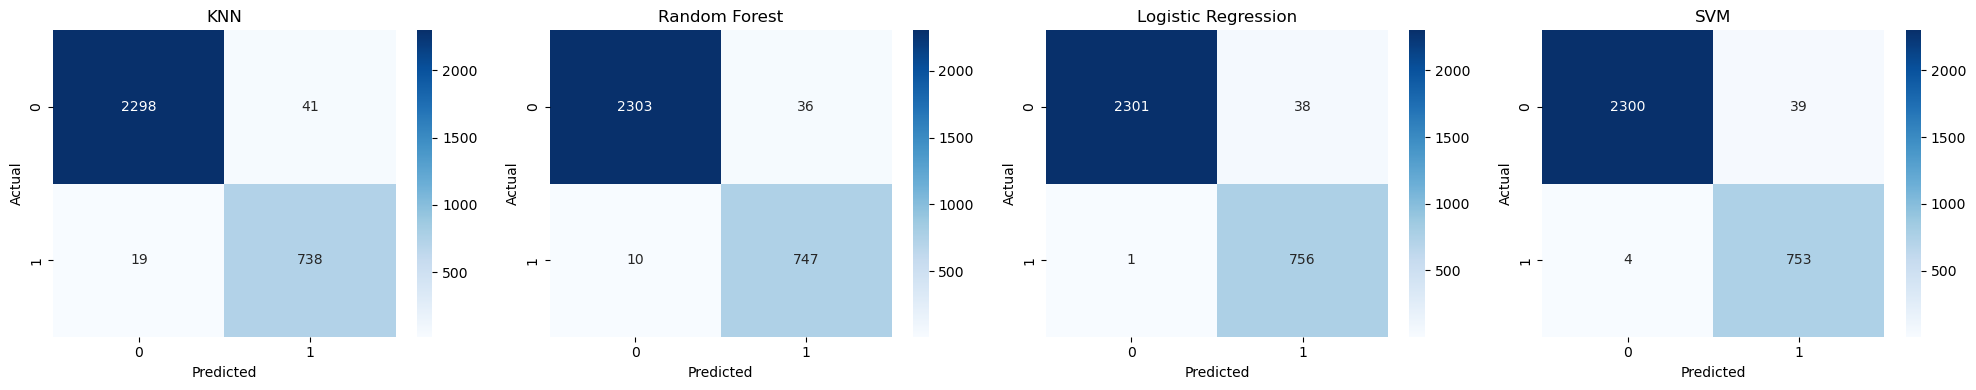

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(20, 4))

for i, (name, model) in enumerate(models.items()):
    cm = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## 11. Борьба с несбалансированностью классов (Imbalanced Data)

**Проблема:**
На этапе EDA мы выяснили, что классов в датасете не поровну:
* **Movies:** ~75%
* **Series:** ~25%

Если просто разбить данные случайно, в тестовую выборку может попасть слишком мало сериалов, и модель не научится их распознавать.

**Решение:**
Мы использовали метод **стратификации (Stratification)** при разделении выборки:
`train_test_split(..., stratify=y)`

Это гарантировало, что пропорция (75/25) сохранилась и в `train`, и в `test`. Благодаря этому, даже при меньшем количестве данных, модель **Logistic Regression** показала `Recall = 0.99` для меньшего класса (Series), то есть проблема дисбаланса была успешно решена.

## 12. Исключение коррелированных переменных

**Проблема:**
Мультиколлинеарность — это когда два признака очень сильно коррелируют друг с другом (дублируют информацию). Это вредит линейным моделям (Logistic Regression, SVM), делая веса признаков неустойчивыми.

**Решение:**
1.  На этапе построения тепловой карты (Heatmap) мы увидели корреляцию **0.90** между `Rotten Tomatoes Score` и `Metacritic Score`.
2.  Оба эти признака содержали много пропусков.
3.  Мы удалили их из датасета. Это устранило мультиколлинеарность и позволило модели ориентироваться на уникальные признаки (`IMDb Score`, `Runtime`, `View Rating`).

## 13. Общие выводы

В ходе работы был пройден полный цикл ML-проекта: от очистки данных до сравнения моделей.

**Ключевые этапы:**
1.  **Предобработка:** Заполнены пропуски, удалены "мусорные" колонки, применено One-Hot кодирование для категорий.
2.  **Нормализация:** Использован `StandardScaler`, что было критически важно для KNN и SVM.
3.  **Моделирование:** Протестированы 4 алгоритма (KNN, RandomForest, LogReg, SVM).

**Результаты:**
* **Лучшая модель:** **Logistic Regression**.
* **Метрики:** Accuracy **98.7%**, F1-Score для сериалов **0.975**.
* **Ошибки:** Модель допустила всего **1 ошибку** второго рода (пропустила 1 сериал из 757).

**Интерпретация:**
Успех простой линейной модели (Логистическая регрессия) говорит о том, что классы "Фильм" и "Сериал" в пространстве признаков разделяются линейно. Вероятно, признаки **Runtime** (Длительность) и **View Rating** (Возрастной рейтинг) создают четкую границу. Например, контент длительностью < 30 минут — это почти всегда эпизод сериала, а > 90 минут — фильм.

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score

models = {
    'KNN': knn,
    'Random Forest': rf,
    'Logistic Regression': log_reg,
    'SVM': svc
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (Series)': precision_score(y_test, y_pred),
        'Recall (Series)': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    })

compare_df = pd.DataFrame(results)
print(compare_df.sort_values(by='F1-Score', ascending=False))

                 Model  Accuracy  Precision (Series)  Recall (Series)  \
2  Logistic Regression  0.987403            0.952141         0.998679   
3                  SVM  0.986111            0.950758         0.994716   
1        Random Forest  0.985142            0.954023         0.986790   
0                  KNN  0.980620            0.947368         0.974901   

   F1-Score  
2  0.974855  
3  0.972240  
1  0.970130  
0  0.960938  
